# Manipulation des donnnées - Introduction

On fait une première étude rapide des données 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from datetime import (
    datetime as DateTime, 
    timedelta as TimeDelta)

# Importation de la base de donnée

In [2]:
# on commence par lire la table 
df_global = pd.read_csv("../data/complete_merged_dataset.csv", sep = ";")

# sur chaque date la fin n'est pas indispensable car l'heure est toujours la même, on peut donc enlever cette partie pour simplifier. 
parser = lambda x: x[:-21]
df_global["horodate"] = df_global["horodate"].map(parser)

# puis on peut utiliser un type spécialisé dans le traitement des dates : 
df_global["horodate"] = pd.to_datetime(df_global["horodate"])

# dans un premier temps les colonnes dq et top ne nous intéressent pas : 
del df_global["dq"]
del df_global["top"]

# on rename la colonne percentile_50 
df_global = df_global.rename(columns = {"percentile_50": "prediction"})

# de plus on aimerait que les id_client se suivent, par exemple 8 n'est pas présent. 
id_client = df_global["id_client"].unique()
id_rename = {} 
for i in range(len(id_client)): 
    id_rename[str(id_client[i])] = i +1 
client_rename = lambda x : id_rename[str(x)]
df_global["id_client"] = df_global["id_client"].map(client_rename)

In [3]:
# pour récupérer le jour / mois / année : 
df_global["horodate"].dt.day
df_global["horodate"].dt.month
df_global["horodate"].dt.year

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
38044    2023
38045    2023
38046    2023
38047    2023
38048    2023
Name: horodate, Length: 38049, dtype: int64

In [4]:
# on peut aussi partir du fichier enregistré 
df_global = pd.read_csv("../data/dataset_modify")
del df_global["Unnamed: 0"]
df_global["horodate"] = pd.to_datetime(df_global["horodate"])

## Analyse de la base de donnée

In [5]:
#df_global = df_global.set_index(["id_client", "horodate"])

In [6]:
df_global.index

RangeIndex(start=0, stop=38049, step=1)

# Etat des lieux des erreurs 

In [7]:
# on rajoute quelques colonnes pour les erreurs : 
df_global["error"] = df_global["real_consumption"] - df_global["forecasted_consumption"]
df_global["abs_error"] = np.abs(df_global["error"])

# on rajoute une colonne qui mesure l'erreur entre la consommation réelle et l'estimation de airliquide : 
df_global["corr_error"] = np.abs(df_global["real_consumption"] - df_global["prediction"])

# on fait un groupby sur les clients : 
df_byClient = df_global.groupby("id_client")

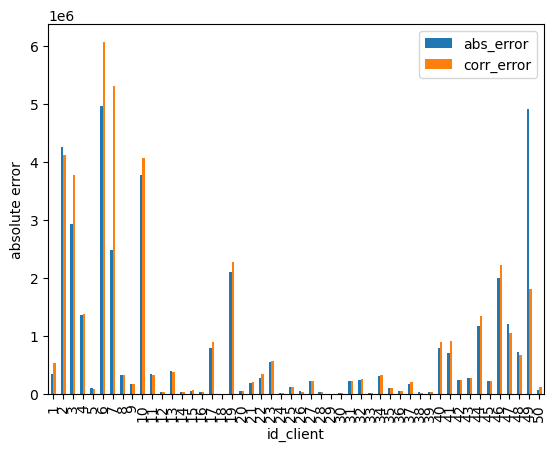

In [8]:
# visualisation des erreurs et des erreurs après correction par airliquide. 
df_global.pivot_table(values = ["abs_error", "corr_error"], index = "id_client", aggfunc=sum).plot.bar(ylabel = "absolute error");

In [9]:
def plot_consumption(n): 
    df_byClient.get_group(n).set_index("horodate").plot(y = ["forecasted_consumption", "real_consumption", "prediction"], title = f"Client {n}")

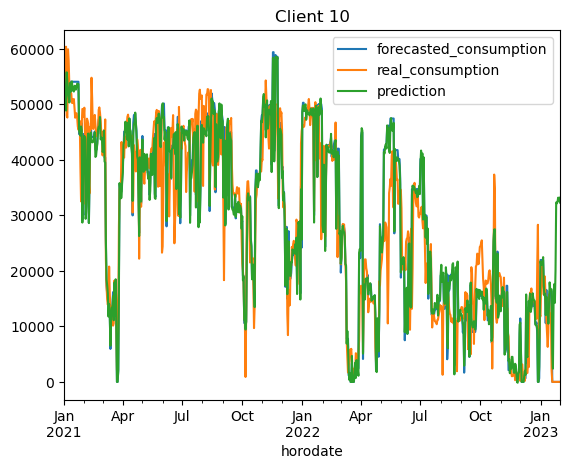

In [10]:
plot_consumption(10)

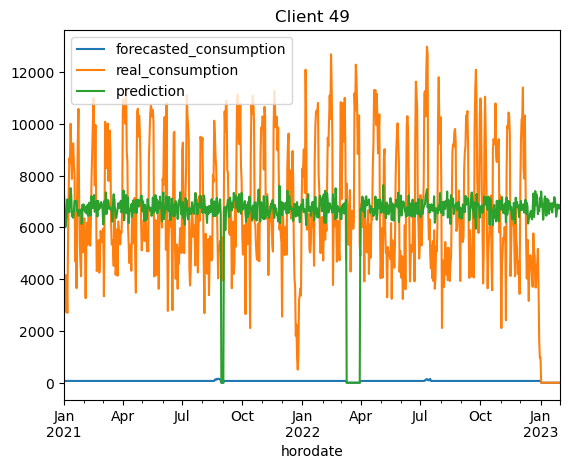

In [11]:
plot_consumption(49)

In [12]:
# visualiser les erreurs par périodes de l'année 
def visualize_error(n): 
    df_byClient.get_group(n).set_index("horodate").plot(y = ["error", "abs_error"], title = f"Client {n}")

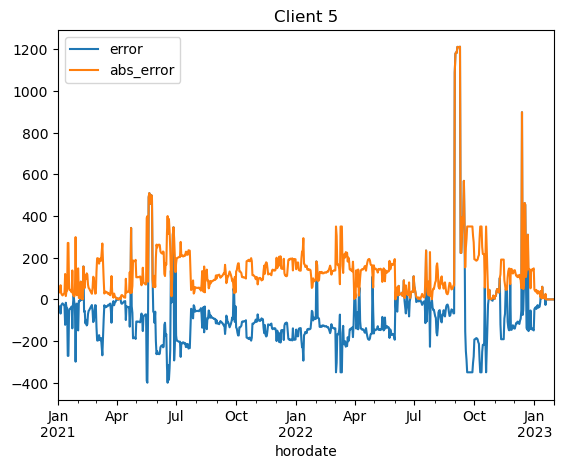

In [13]:
visualize_error(5)

In [14]:
# on veut trier les erreurs par mois. 
remove_day = lambda x : x.strftime("%Y-%m")
df_global["horodate-YM"] = df_global["horodate"].map(remove_day)

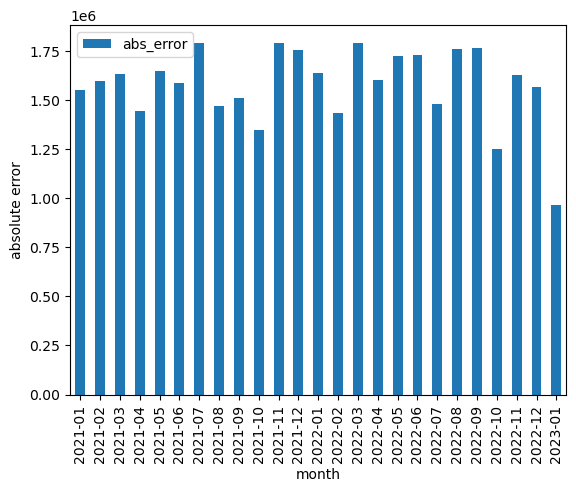

In [15]:
df_global.pivot_table(values = "abs_error", index = "horodate-YM", aggfunc=sum).plot.bar(xlabel = "month", ylabel = "absolute error"); 

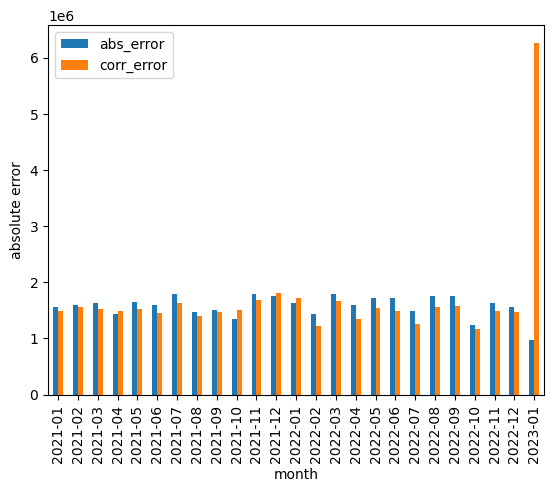

In [16]:
df_global.pivot_table(values = ["abs_error", "corr_error"], index = "horodate-YM", aggfunc=sum).plot.bar(xlabel = "month", ylabel = "absolute error"); 

In [17]:
bourse = pd.read_csv("../data/HYDROGENEDEFRANCE_2023-03-31-2.txt", sep = "\t").drop(["Unnamed: 7","devise"], axis = 1)

In [18]:
bourse

,date,ouv,haut,bas,clot,vol
0,24/06/2021 00:00,31.10,33.30,29.00,32.30,125861
1,25/06/2021 00:00,33.00,33.25,32.20,32.20,86472
2,28/06/2021 00:00,33.50,33.50,32.50,32.80,66981
3,29/06/2021 00:00,32.90,33.00,30.10,31.30,49774
4,30/06/2021 00:00,31.50,32.60,31.00,31.60,20883
...,...,...,...,...,...,...
454,27/03/2023 00:00,18.84,18.84,18.46,18.70,4082
455,28/03/2023 00:00,18.70,18.86,18.36,18.50,2755
456,29/03/2023 00:00,18.58,18.58,18.10,18.18,2171
457,30/03/2023 00:00,18.08,18.08,17.68,17.78,2667


In [19]:
bourse["date"]

0      24/06/2021 00:00
1      25/06/2021 00:00
2      28/06/2021 00:00
3      29/06/2021 00:00
4      30/06/2021 00:00
             ...       
454    27/03/2023 00:00
455    28/03/2023 00:00
456    29/03/2023 00:00
457    30/03/2023 00:00
458    31/03/2023 00:00
Name: date, Length: 459, dtype: object

In [20]:
df_global

,id_client,horodate,real_consumption,forecasted_consumption,prediction,error,abs_error,corr_error,horodate-YM
0,1,2021-01-01,8396.00,8400.0,8323.319457,-4.00,4.00,72.680543,2021-01
1,1,2021-01-02,8395.00,8400.0,8194.785384,-5.00,5.00,200.214616,2021-01
2,1,2021-01-03,8396.00,8400.0,8183.265980,-4.00,4.00,212.734020,2021-01
3,1,2021-01-04,8397.00,8400.0,8420.826672,-3.00,3.00,23.826672,2021-01
4,1,2021-01-05,8395.73,8400.0,8123.422185,-4.27,4.27,272.307815,2021-01
...,...,...,...,...,...,...,...,...,...
38044,50,2023-01-27,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38045,50,2023-01-28,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38046,50,2023-01-29,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38047,50,2023-01-30,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01


<Axes: >

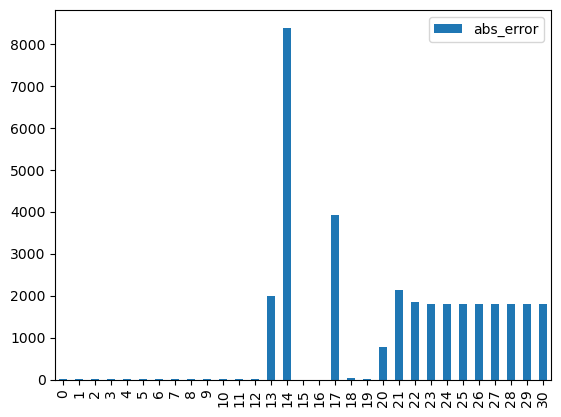

In [21]:
df_global.iloc[:31].plot.bar(y = "abs_error")

## Première régression

In [22]:
# on a besoin d'une librairie pour faire de la régression 
from sklearn.linear_model import LinearRegression

In [23]:
# on sépare le dataFrame en un dataFrame pour chaque client :
n = df_global["id_client"].max()
clients = [df_global.groupby("id_client").get_group(i).copy() for i in range(1,n+1)]

In [24]:
# pour qu'on puisse traiter les jours facilements on change un peu le format : 
reference_date = pd.to_datetime("2021-01-01")
for i in range(n): 
    clients[i]["jour"] = clients[i]["horodate"].map(lambda x: (x - reference_date).days)

In [25]:
# séparation des données de train / test : 
train_size = int(len(client1) * 0.8)
train_data = [client[:train_size] for client in clients]
test_data = [client[train_size:] for client in clients]

NameError: name 'client1' is not defined

In [ ]:
# on utilise nos variables d'intérêt : 
X_train = [train_client[["jour", "forecasted_consumption"]] for train_client in train_data]
y_train = [train_client[["real_consumption"]] for train_client in train_data]

X_test = [test_client[["jour", "forecasted_consumption"]] for test_client in test_data]
y_test = [test_client[["real_consumption"]] for test_client in test_data]

In [ ]:
# création des modèles : 
models = [LinearRegression() for _ in range(n)]
for i, model in enumerate(models): 
    model.fit(X_train[i], y_train[i])

In [ ]:
y_pred = []
for i, model in enumerate(models) : 
    y_pred.append(model.predict(X_test[i]).reshape(len(X_test[i])))

## Création du modèle global : 

In [ ]:
global_model = lambda i : models[i]

## Test des modèles :

In [ ]:
i = 2
fig, ax = plt.subplots(2, sharey=True)
ax[0].plot(abs(y_pred[i] - np.array(test_data[i]["forecasted_consumption"])))
ax[1].plot(test_data[i]["corr_error"])

In [ ]:
for i in range(n):
    if abs(y_pred[i] - np.array(test_data[i]["forecasted_consumption"])).sum() - test_data[i]["corr_error"].sum() < 0 :
        print("+++")
    else :
        print("---")